<a href="https://colab.research.google.com/github/gurovic/MLCourse/blob/main/015_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  <a href="https://kaggle.com/kernels/welcome?src=https://github.com/gurovic/MLCourse/blob/main/010_read.ipynb" target="_parent"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>

  # Визуализация данных

In [5]:
# !pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



## 🟢 Базовый уровень (Matplotlib)

### 1.1 Гистограмма
**Для анализа распределения числовой переменной:**

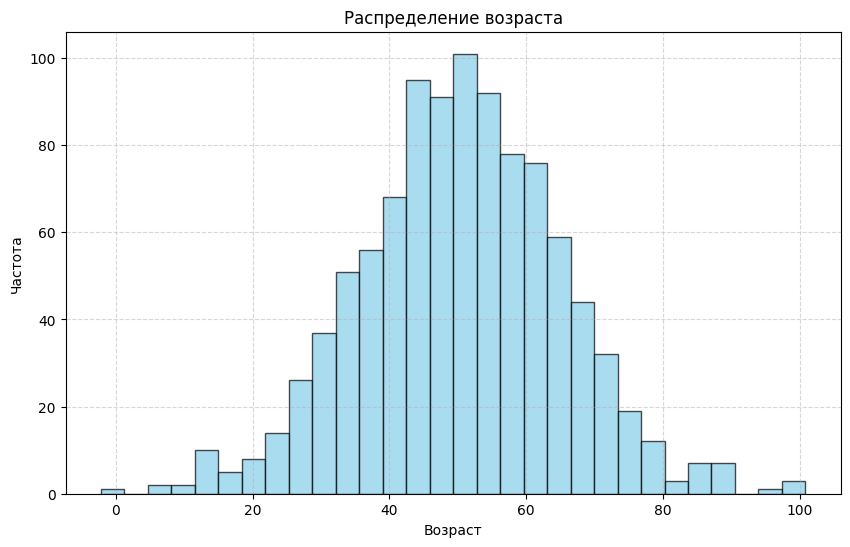

In [6]:
data = np.random.normal(50, 15, 1000)

plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.grid(linestyle='--', alpha=0.5)
plt.show()

### 1.2 Scatter Plot
**Для анализа связи двух числовых переменных:**

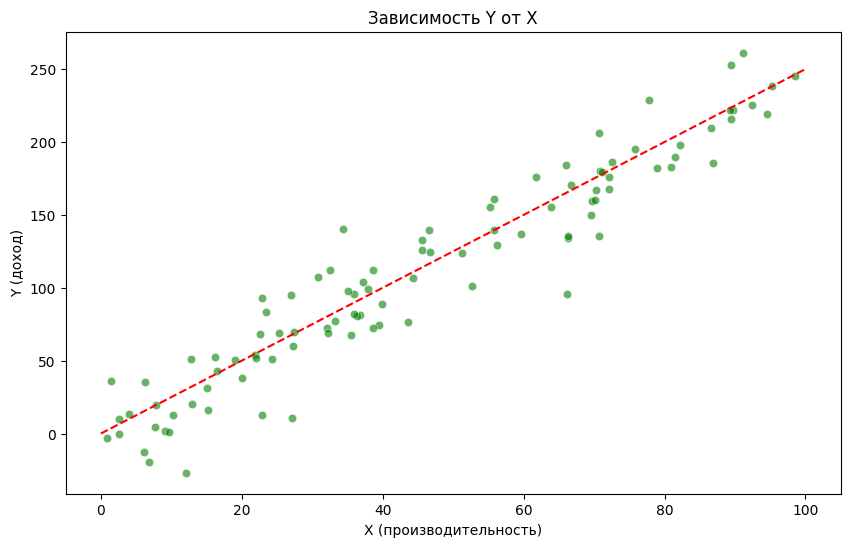

In [12]:
x = np.random.rand(100) * 100
y = 2.5 * x + np.random.normal(0, 20, 100)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, c='green', alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Зависимость Y от X')
plt.xlabel('X (производительность)')
plt.ylabel('Y (доход)')
plt.plot([0,100], [0,250], 'r--')  # Линия тренда
plt.show()

## 🟡 Продвинутый уровень (Seaborn)

### 2.1 Heatmap
**Для визуализации матрицы корреляций:**

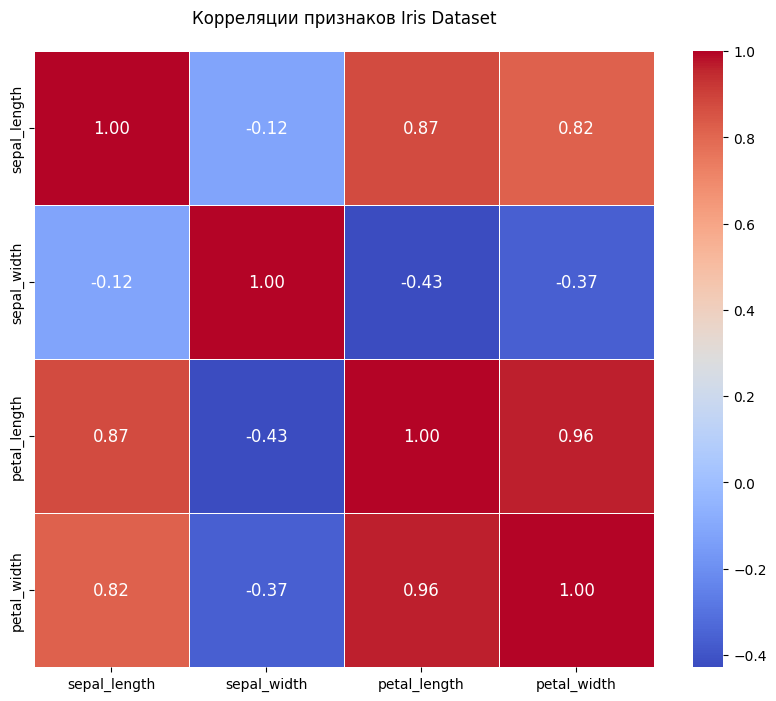

In [15]:
df = sns.load_dataset('iris')
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            linewidths=0.5,
            fmt='.2f',
            annot_kws={'size':12})
plt.title('Корреляции признаков Iris Dataset', pad=20)
plt.show()

### 2.2 Pairplot
**Для анализа парных взаимосвязей в многомерных данных:**

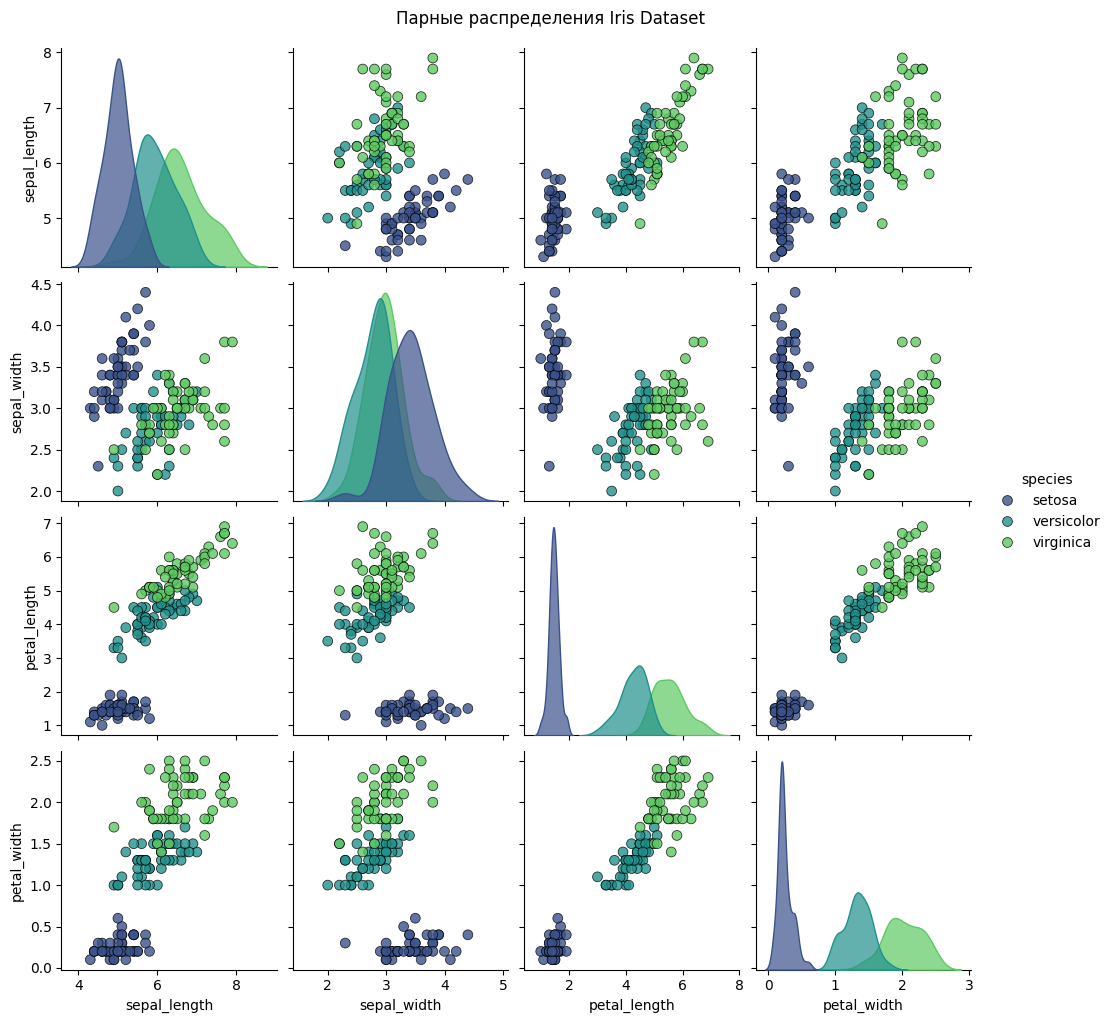

In [17]:
sns.pairplot(df,
             hue='species',
             palette='viridis',
             plot_kws={'alpha':0.8, 's':50, 'edgecolor':'k'},
             diag_kws={'alpha':0.7})
plt.suptitle('Парные распределения Iris Dataset', y=1.02)
plt.show()

### 2.3 Boxplot
**Для сравнения распределений по категориям:**

([подробнее об усах в boxplot](https://github.com/gurovic/MLCourse/blob/main/015_10_boxplot_whiskers.md))

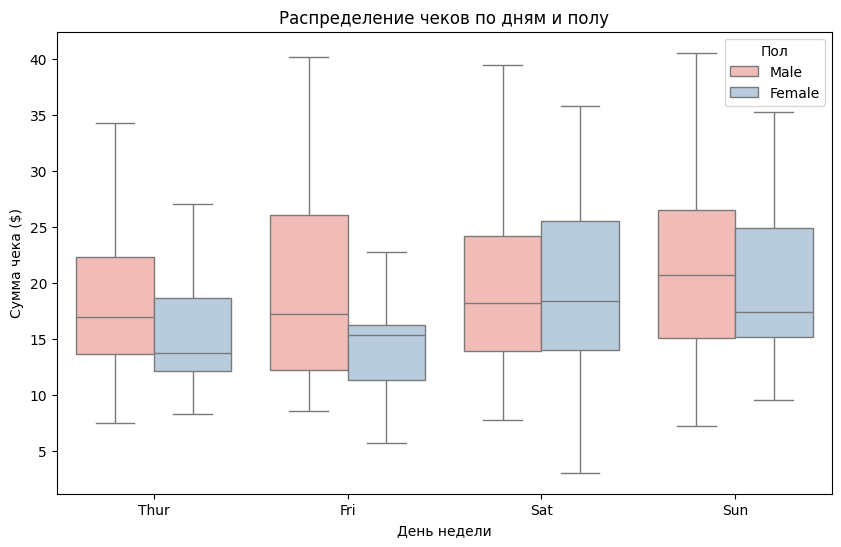

In [19]:
tips = sns.load_dataset('tips')

plt.figure(figsize=(10, 6))
sns.boxplot(x='day',
            y='total_bill',
            data=tips,
            hue='sex',
            palette='Pastel1',
            showfliers=False)
plt.title('Распределение чеков по дням и полу')
plt.xlabel('День недели')
plt.ylabel('Сумма чека ($)')
plt.legend(title='Пол')
plt.show()

## 🔴 Экспертный уровень (Комбинированные техники)

### 3.1 Кастомные стили

In [21]:
plt.style.use('seaborn-v0_8-darkgrid')  # Выбор темы
sns.set_palette('husl')  # Палитра
plt.rcParams['font.size'] = 12  # Размер шрифта

### 3.2 Сочетание графиков

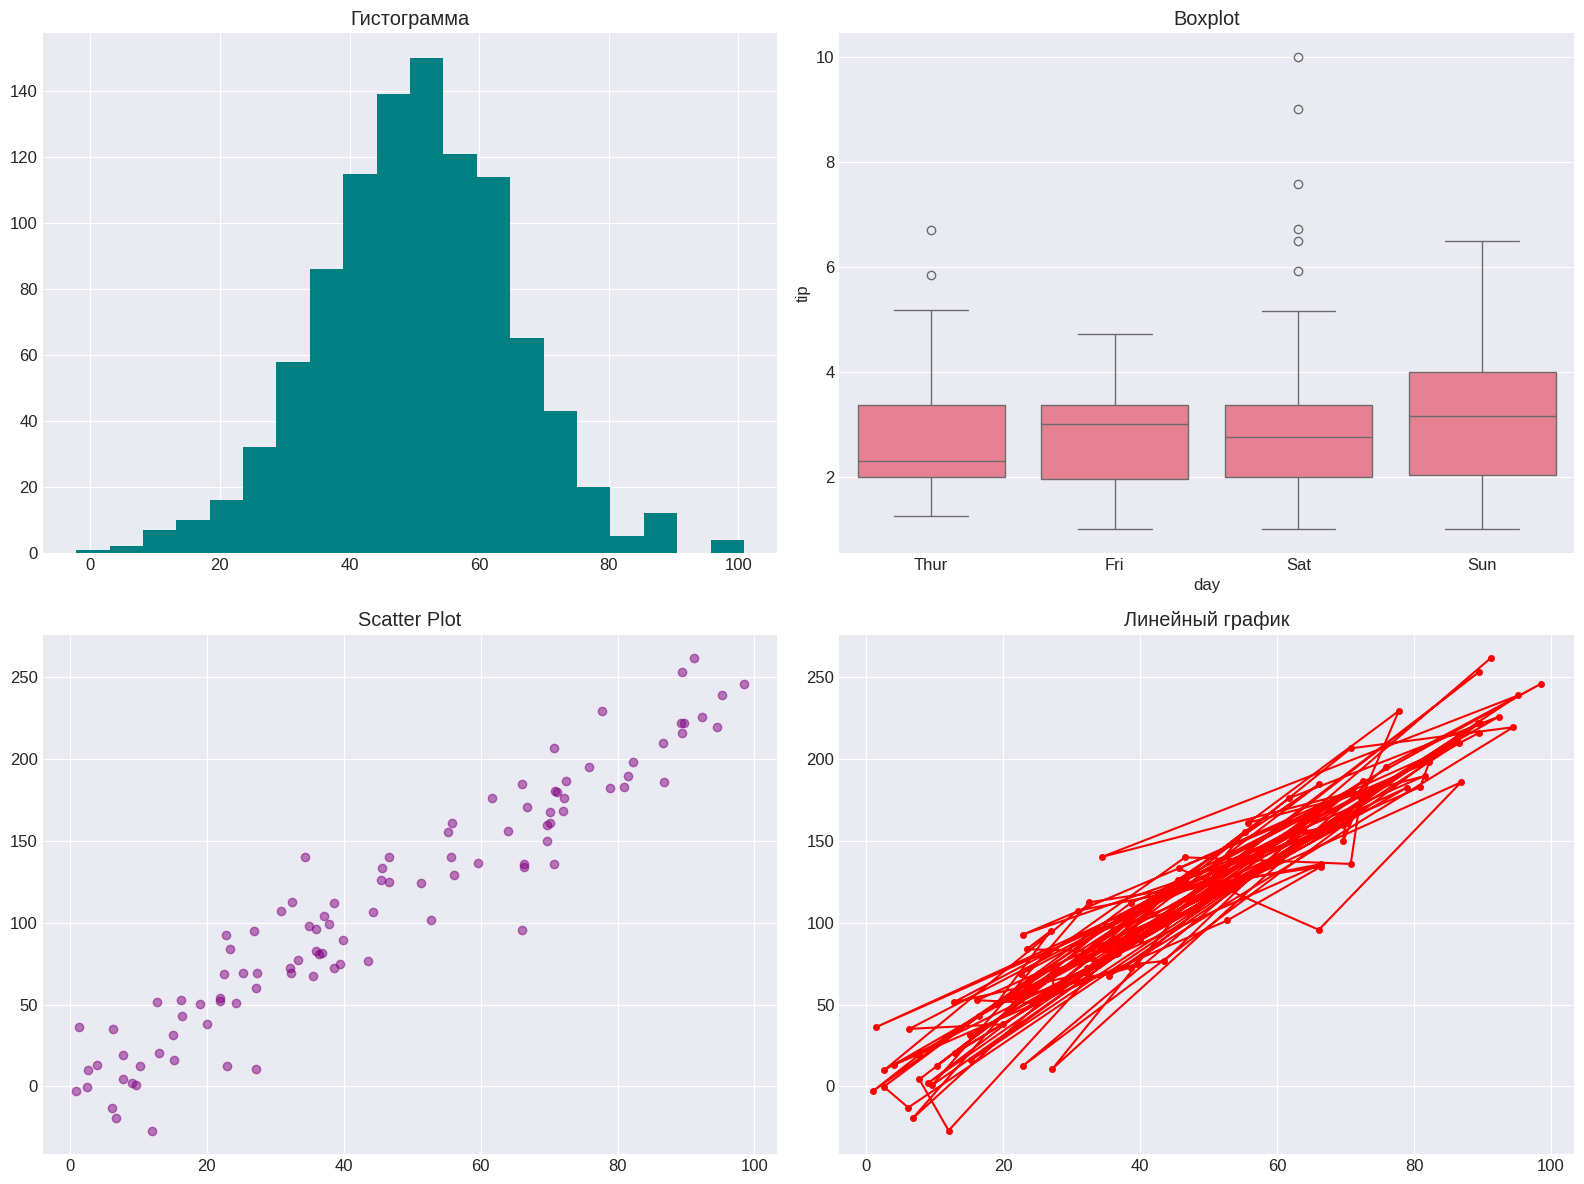

In [24]:
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

# Гистограмма
ax[0,0].hist(data, bins=20, color='teal')
ax[0,0].set_title('Гистограмма')

# Boxplot
sns.boxplot(data=tips, x='day', y='tip', ax=ax[0,1])
ax[0,1].set_title('Boxplot')

# Scatter
ax[1,0].scatter(x, y, c='purple', alpha=0.5)
ax[1,0].set_title('Scatter Plot')

# Линейный график
ax[1,1].plot(x, y, 'ro-', markersize=4)
ax[1,1].set_title('Линейный график')

plt.tight_layout()
plt.show()

### 3.3 Анимированные графики

/usr/local/lib/python3.11/dist-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


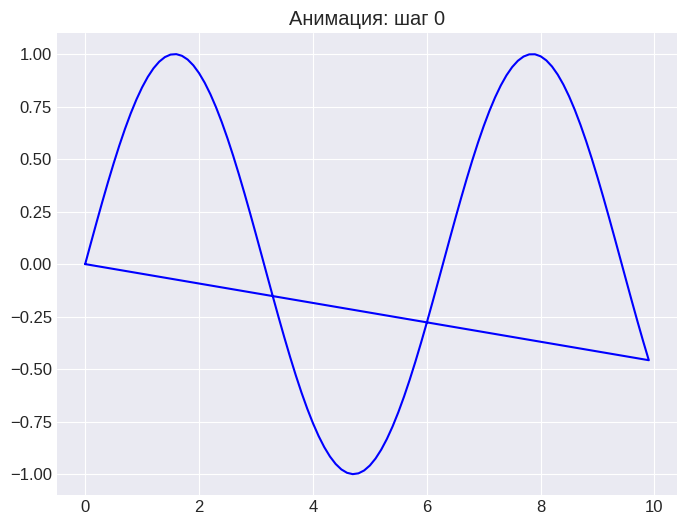

In [37]:
from matplotlib.animation import FuncAnimation

# for animation in colab
from matplotlib import rc
rc('animation', html='jshtml')

fig = plt.figure(figsize=(8,6))
x = []
y = []

def animate(i):
    x.append(i*0.1)
    y.append(np.sin(i*0.1))
    plt.cla()
    plt.plot(x, y, 'b-')
    plt.title(f'Анимация: шаг {i}')

ani = FuncAnimation(fig, animate, frames=100, interval=50)
# for animation in colab: run and wait!
ani
# for animation in IDE
# plt.show()

## 📊 Чеклист по уровням

| Уровень | Навыки |
|---------|--------|
| 🟢 | Гистограммы, scatter plot, базовое оформление |
| 🟡 | Heatmap, pairplot, boxplot, палитры |
| 🔴 | Кастомизация стилей, анимации, субплoты |

## ⚠️ Антипаттерны
1. **Неподписанные оси** (без units и пояснений)
2. **3D-графики** без реальной необходимости
3. **Слишком много категорий** в одном графике (>7 цветов)
4. **Искажение масштабов** (обрезанные оси без пометок)

## 🚀 Продвинутые советы

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_length',
                   color='species', size='petal_width', hover_name='species')
fig.show()

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title='Автоотчет')
profile.to_file('report.html')

In [ ]:
# Hexbin для 100k+ точек
plt.hexbin(x, y, gridsize=50, cmap='inferno', bins='log')
plt.colorbar()

## 📌 Тренировочные задания

### 🟢 Базовый уровень
1. Постройте гистограмму для колонки `petal_length` из Iris
2. Создайте scatter plot зависимости `sepal_width` от `sepal_length`

### 🟡 Продвинутый уровень
1. Визуализируйте корреляции в Titanic dataset через heatmap
2. Сравните `total_bill` по дням через boxplot с разделением по time

### 🔴 Экспертный уровень
1. Создайте анимированный график изменения температуры за год
2. Постройте интерактивный 3D-график для 3 числовых признаков

## 📌 Пример решения 🟢 Задания 2

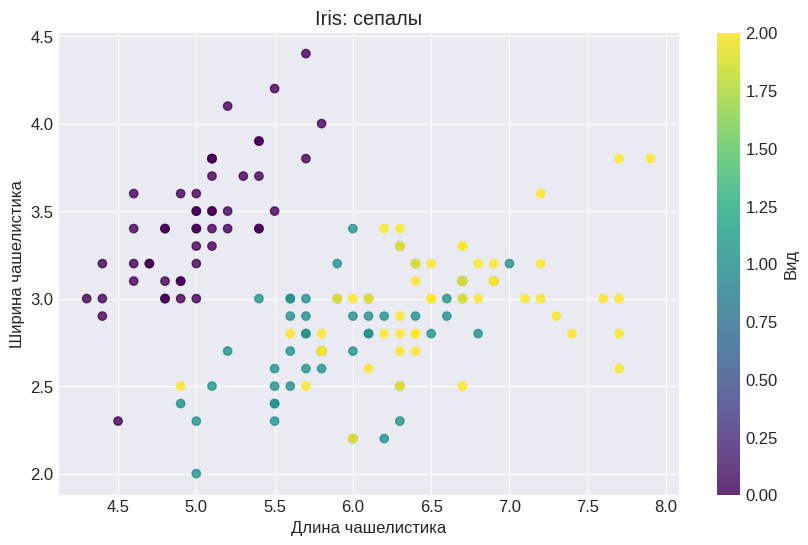

In [38]:
iris = sns.load_dataset('iris')
plt.figure(figsize=(10,6))
plt.scatter(iris['sepal_length'], iris['sepal_width'],
            c=iris['species'].astype('category').cat.codes,
            cmap='viridis', alpha=0.8)
plt.colorbar(label='Вид')
plt.xlabel('Длина чашелистика')
plt.ylabel('Ширина чашелистика')
plt.title('Iris: sepals')
plt.show()

## 📌 Заключение
Ключевые принципы:
1. **Выбирайте график под задачу**:  
   - Распределение → Гистограмма/Boxplot  
   - Связи → Scatter/Heatmap  
   - Сравнение → Barplot
2. **Контекст важнее красоты** – график должен отвечать на вопрос
3. **Оптимизируйте для аудитории** – научная статья vs презентация
4. **Интерактивность** помогает в исследовательском анализе

Помните: хорошая визуализация экономит часы анализа таблиц!